# Resolution of Climate Model Data

This module of the tutorial is focussing on the different resolutions for global and regional climate model data. 
Test data are available in the VirtualMashine ``~/data/orog/`` or to be fetched directly from the ESGF archive (see Module 1)

### load necessary libraries for plotting maps

In [2]:
print('Hello FAZO')

Hello FAZO


In [4]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# additional features
# from cartopy import config
# from cartopy.util import add_cyclic_point

# to show the plots inline (this is only necessary when running the code in a notebook)
%matplotlib inline 

### configuration of the map focussing on Kirgistan and Tadjikistan

The ploting of maps is realised with the python libraies matplotlib and cartopy 
Further code ideas can be found here: https://scitools.org.uk/cartopy/docs/v0.15/index.html


In [5]:
# NaturalEarthFeature is an open data source providing general data like catchment areas

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', # Valid scales are "110m", "50m", and "10m".
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

# defining a colorsceem 
cmap='gist_earth_r'

# extent of the map (lat0, lat1, lon0, lon1)
extent=(66.0 , 81 , 36.5, 43.7) 
linewidth=0.001

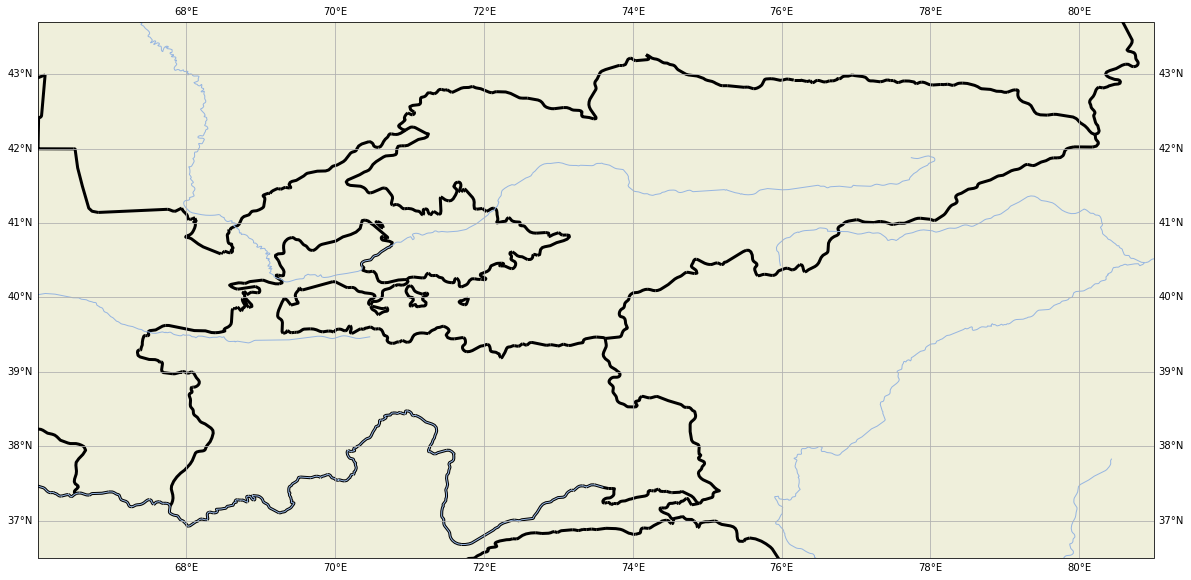

In [6]:
# defining a new graphic 
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')
# fig.tight_layout()

# setting projections and extent of the map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)

# ax = plt.axes(projection=ccrs.Orthographic(central_longitude=70.0, central_latitude=40.0, globe=None))


# defining some features to be seen in the map:
ax.add_feature(land_50m)
# ax.add_feature(cfeature.LAKES) 
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linewidth=3,)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

ax.gridlines(draw_labels=True)
# ax.stock_img()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# save the graphic as a png:
plt.savefig(fname='/home/testuser/Pictures/map_country_overview.png')

# show the result
plt.show()

### open a climate model file 

In the Tutorial Virtual Mashine there are some test data in the folder ``/home/testuser/data/orog``. 

``orog`` is the variable for the orography underlying in the climate model.  

In [7]:
# loading necessary librabries
from netCDF4 import Dataset
import numpy as np
from os.path import join

# defining the folder where the data are stored
p = '/home/testuser/data/orog/'

# defining the file pathes as python variables:

# CMIP5_LR = join(p, 'orog_fx_MPI-ESM-LR_historical_r0i0p0.nc')
# CMIP5_MR = join(p, 'orog_fx_MPI-ESM-MR_historical_r0i0p0.nc')
# CMIP5_P  = join(p, 'orog_fx_MPI-ESM-P_historical_r0i0p0.nc')

CMIP6_HR = join(p, 'orog_fx_CNRM-CM6-1-HR_historical_r1i1p1f2_gr.nc')
CMIP6_LR = join(p, 'orog_fx_IPSL-CM6A-LR_ssp126_r2i1p1f1_gr.nc')

CAS22 = join(p, 'orog_CAS-22_MPI-M-MPI-ESM-LR_historical_r0i0p0_GERICS-REMO2015_v1_fx.nc')
CAS44 = join(p, 'orog_CAS-44_ECMWF-ERAINT_evaluation_r0i0p0_MOHC-HadRM3P_v1_fx.nc')




# orog_fx_CNRM-CM6-1_historical_r1i1p1f2_gr.nc




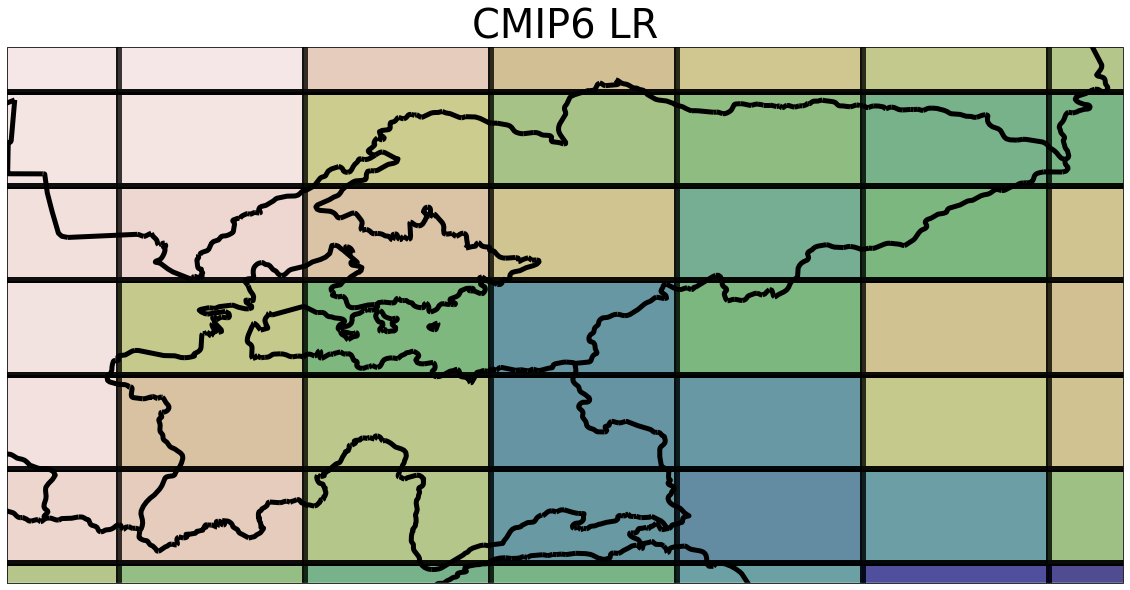

In [10]:
###############################
# CMIP6 
ds = Dataset(CMIP6_LR)
orogC6_LR = ds.variables['orog'] 
latC6_LR = ds.variables['lat']
lonC6_LR = ds.variables['lon']


# fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(20,20 ), facecolor='w', edgecolor='k')
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)
ax.add_feature(cfeature.COASTLINE, linewidth=7)

lonsC6_LR, latsC6_LR = meshgrid(lonC6_LR, latC6_LR)


cs = ax.pcolormesh(lonsC6_LR, latsC6_LR, orogC6_LR, transform=ccrs.PlateCarree(), cmap=cmap, 
                   edgecolor='black', linewidth=5, alpha=0.7) #, vmin=0, vmax=3800)

plt.title('CMIP6 LR', fontsize=40)

plt.savefig(fname='/home/testuser/Pictures/CIMP6_LR.png')

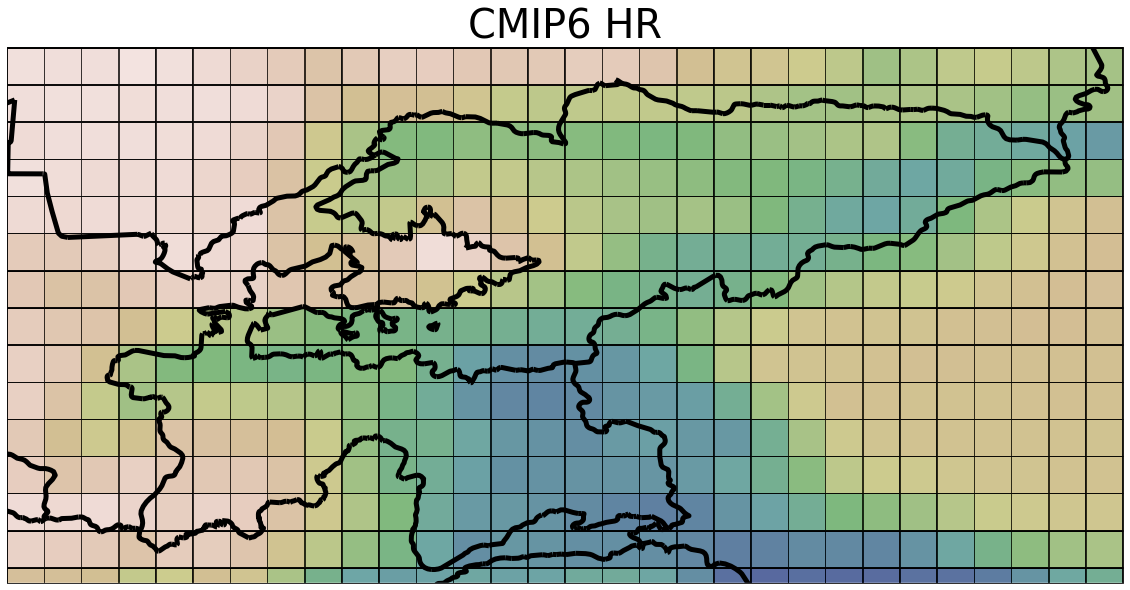

In [11]:
ds = Dataset(CMIP6_HR)
orogC6_HR = ds.variables['orog'] 
latC6_HR = ds.variables['lat']
lonC6_HR = ds.variables['lon']

# fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(20,20 ), facecolor='w', edgecolor='k')
fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)
ax.add_feature(cfeature.COASTLINE, linewidth=7)

lonsC6_HR, latsC6_HR = meshgrid(lonC6_HR, latC6_HR)

cs = ax.pcolormesh(lonsC6_HR, latsC6_HR, orogC6_HR, transform=ccrs.PlateCarree(), cmap=cmap, 
                   edgecolor='black', linewidth=0.5, alpha=0.7) #, vmin=0, vmax=3800)

plt.title('CMIP6 HR', fontsize=40)

plt.savefig(fname='/home/testuser/Pictures/CIMP6_HR.png')


In [8]:
# 
# 
# 

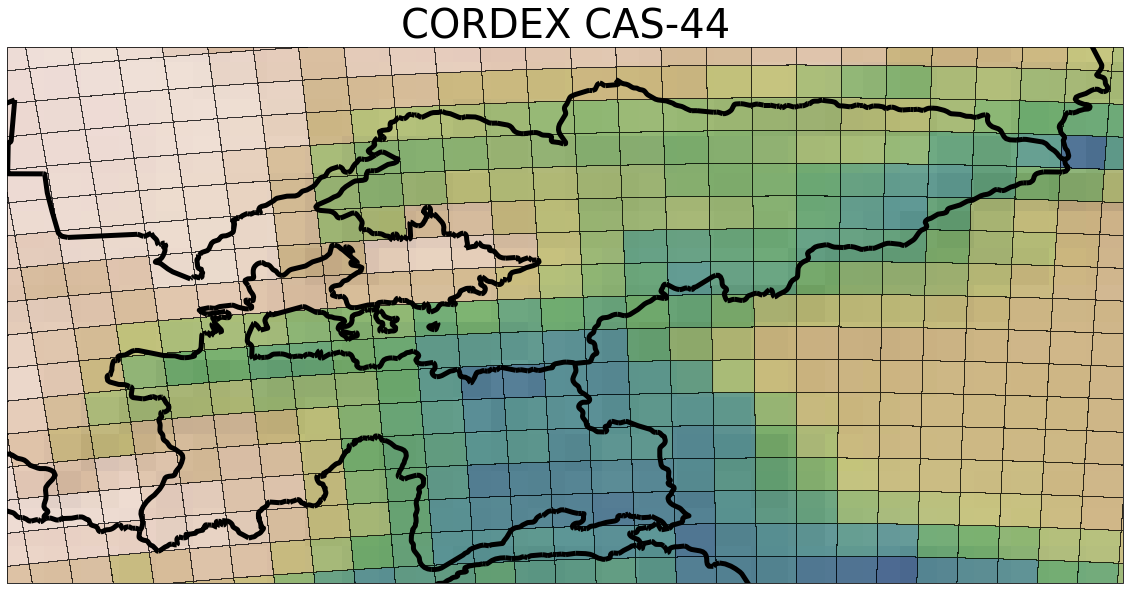

In [9]:
################
# CORDEX CAS-44

ds = Dataset(CAS44)
orog44 = ds.variables['orog'] 
lats44 = ds.variables['lat']
lons44 = ds.variables['lon']
lon44 = lons44[0,:]
lat44 = lats44[:,0]

fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)
ax.add_feature(cfeature.COASTLINE, linewidth=7)

ax.stock_img()
cs = ax.pcolormesh(lons44, lats44, orog44, transform=ccrs.PlateCarree(), cmap=cmap, 
                   edgecolor='black', linewidth=0.01, alpha=0.7) # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)

plt.title('CORDEX CAS-44', fontsize=40)
plt.savefig(fname='/home/testuser/Pictures/CAS-44.png')

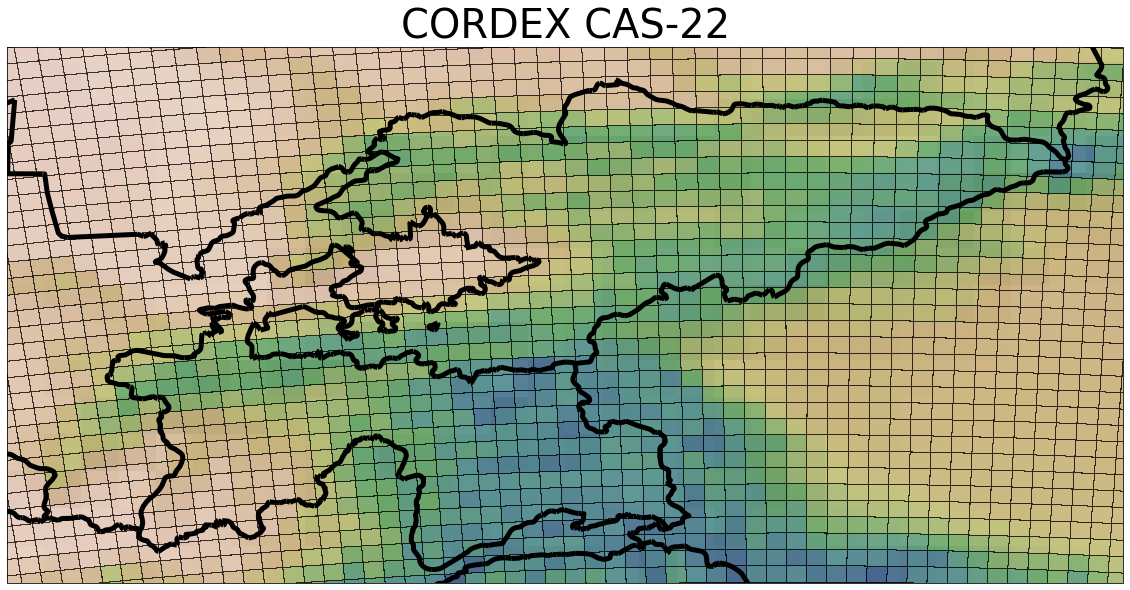

In [12]:
ds = Dataset(CAS22)
orog22 = ds.variables['orog'] 
lats22 = ds.variables['lat']
lons22 = ds.variables['lon']
lon22 = lons22[0,:]
lat22 = lats22[:,0]

fig = plt.figure( figsize=(20,20 ), facecolor='w', edgecolor='k')

# fig.tight_layout()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS, linewidth=5)
ax.add_feature(cfeature.COASTLINE, linewidth=7)

ax.stock_img()
cs = ax.pcolormesh(lons22, lats22, orog22, transform=ccrs.PlateCarree(), cmap=cmap ,
                   edgecolor='black', linewidth=0.01, alpha=0.7) # visible=True, hatch = '|', linestyle='-' ) #, vmin=0, vmax=3800)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# plt.colorbar(cs)

plt.title('CORDEX CAS-22', fontsize=40)
plt.savefig(fname='/home/testuser/Pictures/CAS-22.png')